<a href="https://colab.research.google.com/github/leonardoleandrodev/pinceldrawsimulate/blob/main/draw_simulator_picture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image,ImageDraw
import requests
from random import randint as ran

In [ ]:
def openImage():  
  url = 'https://image.freepik.com/free-photo/young-beautiful-woman-face-portrait-with-healthy-skin_93675-21832.jpg'  
  imageOpen = Image.open(requests.get(url, stream=True).raw)
  #display(imageOpen)
  return imageOpen

In [ ]:
def convertPB(image):
  return image.convert('LA')

In [ ]:
image = openImage()#Image.new(size=(600,300),mode='L',color='white')

In [ ]:
def risk(pos,image :Image,cor):
  w, h = 10, 10
  varia = ran(h-4,h)  
  variaCor = ran(cor[0]+5,cor[0]+10)  
  variaOpacidade = ran(10,55)    
  shape = [(ran(1,5)+pos[0], varia+pos[1]), ((w - 1)+pos[0],(h - varia)+pos[1])]
  im = ImageDraw.Draw(image)  
  im.line(shape, fill =(variaCor,255), width = 0 )
  return image

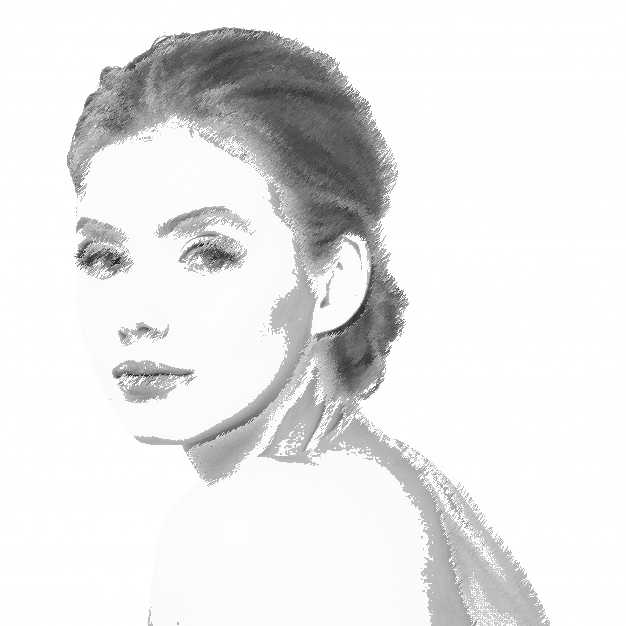

In [ ]:
menorCor = 190
imageConvert = convertPB(image)
imageCopy = image
for x in range(imageConvert.size[0]):
  for y in range(imageConvert.size[1]):
    corPixel = image.getpixel((x,y))
    divmod = ran(1,2)
    if x % divmod == 0 and y % divmod == 0 and corPixel[0] < (menorCor+10):
      #print(image.getpixel((x,y)))
      imageConvert = risk((x,y),imageConvert,corPixel)
    elif corPixel[0] > (menorCor):
      catu = imageConvert.getpixel((x,y))
      if catu[0] > (menorCor):
        imageConvert.putpixel((x,y),(catu[0],20))
      
display(imageConvert)